## CIFAR-10 Veri Kümesinde CNN ile Görüntü Sınıflandırması

<img src='cifar-10.png'>

In [1]:
# Kütüphanelerimizi ve verimizi içe aktarıyoruz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 188s 1us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
y_test.shape

(10000, 1)

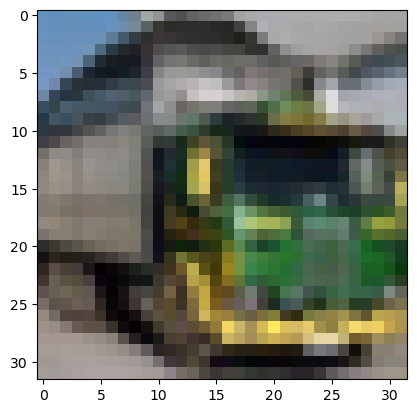

In [8]:
# Görüntülere bakalım
plt.imshow(x_train[14])

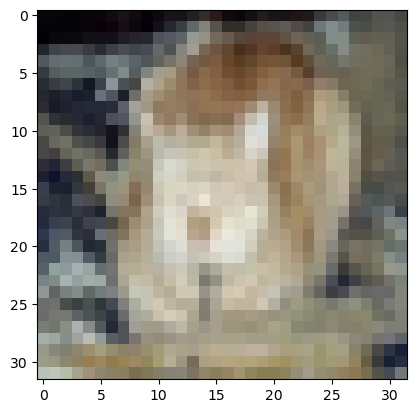

In [13]:
plt.imshow(x_train[33])

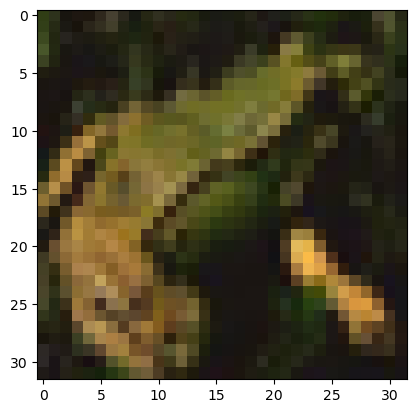

In [14]:
plt.imshow(x_test[41])

In [15]:
x_train[3]

array([[[ 28,  25,  10],
        [ 37,  34,  19],
        [ 38,  35,  20],
        ...,
        [ 76,  67,  39],
        [ 81,  72,  43],
        [ 85,  76,  47]],

       [[ 33,  28,  13],
        [ 34,  30,  14],
        [ 32,  27,  12],
        ...,
        [ 95,  82,  55],
        [ 96,  82,  56],
        [ 85,  72,  45]],

       [[ 39,  32,  15],
        [ 40,  33,  17],
        [ 57,  50,  33],
        ...,
        [ 93,  76,  52],
        [107,  89,  66],
        [ 95,  77,  54]],

       ...,

       [[ 83,  73,  52],
        [ 87,  77,  56],
        [ 84,  74,  52],
        ...,
        [ 99,  93,  70],
        [ 90,  84,  61],
        [ 81,  75,  52]],

       [[ 88,  72,  51],
        [ 90,  74,  52],
        [ 93,  77,  56],
        ...,
        [ 80,  74,  53],
        [ 76,  70,  49],
        [ 82,  76,  55]],

       [[ 97,  78,  56],
        [ 94,  75,  53],
        [ 93,  75,  53],
        ...,
        [ 54,  47,  28],
        [ 63,  56,  37],
        [ 72,  65,  46]]

In [16]:
x_train=x_train/255.0
x_test=x_test/255.0

In [40]:
from keras.utils import np_utils 
from keras.optimizers import SGD, Adam, RMSprop
num_channels = 3
img_rows = 32
img_cols = 32
 
batch_size = 128
num_epochs = 20
num_classes = 10
validation_split = 0.2
optim = RMSprop()

In [42]:
# LABEL'LARI KATEGORİZE ETMEK İÇİN ONE-HOT ENCODING YAPILIR VE GÖRÜNTÜLER NORMALİZE EDİLİR:
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.utils import to_categorical

In [44]:
#CNN 
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (32, 32, 3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64, kernel_size = (4,4), input_shape = (32, 32, 3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation = "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [45]:
history=model.fit(x_train,y_train,batch_size = 32, epochs=3, verbose = 1, validation_data = (x_test, y_test))

Epoch 1/3
1563/1563 [==============================] - 55s 34ms/step - loss: 1.4947 - accuracy: 0.4547 - val_loss: 1.2093 - val_accuracy: 0.5761
Epoch 2/3
1563/1563 [==============================] - 56s 36ms/step - loss: 1.1032 - accuracy: 0.6093 - val_loss: 1.0687 - val_accuracy: 0.6283
Epoch 3/3
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9041 - accuracy: 0.6846 - val_loss: 0.9468 - val_accuracy: 0.6729


In [57]:
_,accuracy=model.evaluate(x_test,y_test)
print ("Accuracy = %2f" % (accuracy*100))

313/313 [==============================] - 3s 8ms/step - loss: 0.9468 - accuracy: 0.6729
Accuracy = 67.290002


In [59]:
accuracy*100

67.29000210762024

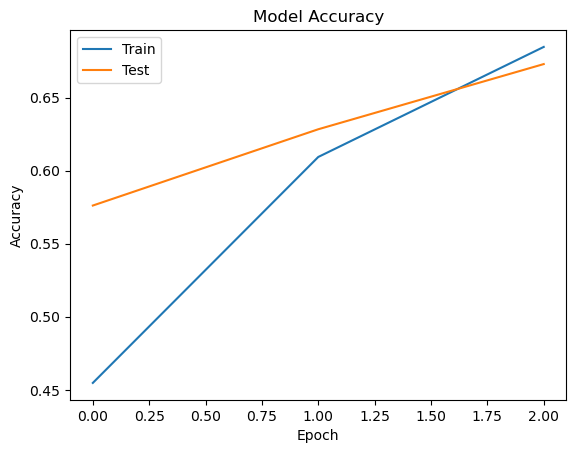

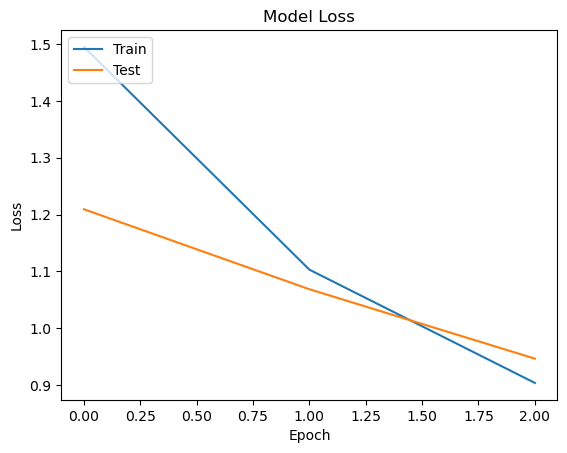

In [58]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

In [46]:
scores=model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.9468 - accuracy: 0.6729


In [47]:
scores[1]

0.6729000210762024

In [48]:
#Modeli diyagramda göstermek için
from keras.utils.vis_utils import plot_model

In [50]:
plot_model(model, to_file='model_plotCNN.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [49]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


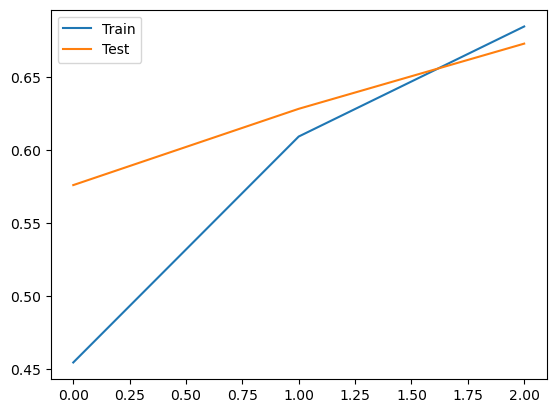

In [51]:
plt.plot(history.history["accuracy"],label="train")
plt.plot(history.history["val_accuracy"],label="test")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)

313/313 [==============================] - 3s 8ms/step


In [65]:
from tensorflow.keras.layers import InputLayer, Reshape, MaxPooling2D